# Getting started with neural networks:
## Classification and regression

### Glossary
**Sample** or **input** -- A training example that we fit into the network\
**Prediction** or **output** -- A result that we get from the networks\
**Target** -- The objection that we try to predict.\
**Classes** -- \
**Label** --\
**Binary classification**\
**Multiclass classification**\
**Scalar regression**\
**Mini batch**

### Binary classification
#### Dataset

In [5]:
# all tensorflow keras buildin datasets
import tensorflow 
dir(tensorflow.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [13]:
# load dataset
from tensorflow.keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

*num_word=10000* only keep the top 10000 most frequently appear in training samples

In [18]:
# decoding review back to text
word_idx = imdb.get_word_index()
reverse_word_idx = dict(
    [(value, key) for (key, value) in word_idx.items()])
decoded_review = ''.join(
    [reverse_word_idx.get(i - 3, '?') for i in X_train[0]])

#### Preparing the data

In [24]:
# we can't fit a list to neural network because of the length different
# so we have to convert a list to a tensor
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Encoding the int sequences via multi-hot encoding. **Multi hot encoding** is one of such popular encoding technique in order to successfully convert categorical variables into numerical variables.


In [54]:
import numpy as np
def vec_seq(sequences, dimension=10000):
    # creates an all-zero matrices
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1
            
    return results

# vectorize sequences (train data)
X_train_vec = vec_seq(X_train)
X_test_vec = vec_seq(X_test)

# vectorize sequences (labels data)
y_train_vec = np.asarray(y_train).astype('float32')
y_test_vec = np.asarray(y_test).astype('float32')

print(X_train_vec.shape)
print(y_test_vec.shape)

(25000, 10000)
(25000,)


### Build model
**Dense layers** or **Fully connected layers** -- A plain layer stack of nuerons (units)
- How many layers to use
- How many units to choose for each layers


#### Model definition

In [60]:
# import library
from tensorflow import keras
from tensorflow.keras.layers import Dense

model = keras.Sequential([
    Dense(16, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Metal device set to: Apple M1 Pro


2022-02-09 15:59:28.265990: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-09 15:59:28.266913: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


*16* mean this particular layers have 16 units stack on top of each other `(input_dimension, 16)` \
*activation='relu'* mean we use relu as the activation function : `relu(dot(Inputs, W) + b)`

#### Compile model
In compil, we need to choose an **optimizer**(what algorithms we use to optimize our model), **loss function**(fucntion that we use to calculate the loss, different between the predictions and the ground-truth, **metrics**(what are the metrice we use for measure how good our model is) for our neural network.

In [62]:
model.compile(
    optimizer = 'rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#### Validating
Split the datasets to Training set and Dev set to prevent **overfitting**(not generalize)

In [64]:
# setting aside a dev set (validation set)
X_dev = X_train_vec[:10000]
partial_X_train = X_train_vec[10000:]

y_dev = y_train_vec[:10000]
partial_y_train = y_train_vec[10000:]

#### Training the model
In order to train the model we use `keras.Sequential()` method `fit()`\
*epochs=20* means we train the model for 20 iterations over all samples in training example in mini-batches of *512*

In [67]:
history = model.fit(
    partial_X_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(X_dev, y_dev)
)

2022-02-09 16:21:32.937876: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20


2022-02-09 16:21:33.515744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 3s 49ms/step - loss: 0.5615 - accuracy: 0.7513 - val_loss: 0.4218 - val_accuracy: 0.8635


2022-02-09 16:21:36.240675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3369 - accuracy: 0.8927 - val_loss: 0.3169 - val_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2419 - accuracy: 0.9231 - val_loss: 0.2883 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1921 - accuracy: 0.9388 - val_loss: 0.2771 - val_accuracy: 0.8894
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1569 - accuracy: 0.9505 - val_loss: 0.2921 - val_accuracy: 0.8847
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1306 - accuracy: 0.9602 - val_loss: 0.2819 - val_accuracy: 0.8878
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1093 - accuracy: 0.9676 - val_loss: 0.3029 - val_accuracy: 0.8828
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0927 - accuracy: 0.9748 - val_loss: 0.3095 - val_accuracy: 0.8843
Epoch 9/20
30

In [68]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Plotting the result

In [70]:
# import library
import matplotlib.pyplot as plt

0.11081330755259841 0.4108383968472481


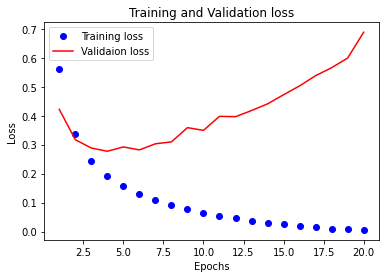

0.9638700127601624 0.8763800442218781


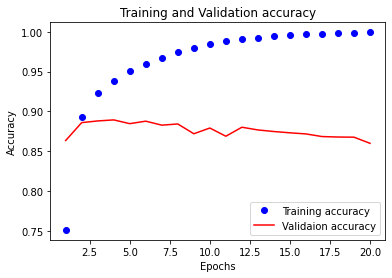

In [90]:
# training and validation loss
def loss_plot():
    loss_vals = history_dict['loss']
    dev_loss_vals = history_dict['val_loss']
    epochs = range(1, len(loss_vals)+1)
    print(np.mean(loss_vals), np.mean(dev_loss_vals))
    # plot
    plt.plot(epochs, loss_vals, 'bo', label='Training loss')
    plt.plot(epochs, dev_loss_vals, 'r', label='Validaion loss')
    plt.title("Training and Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

def acc_plot():
    acc_vals = history_dict['accuracy']
    dev_acc_vals = history_dict['val_accuracy']
    epochs = range(1, len(loss_vals)+1)
    print(np.mean(acc_vals), np.mean(dev_acc_vals))

    # plot
    plt.plot(epochs, acc_vals, 'bo', label='Training accuracy')
    plt.plot(epochs, dev_acc_vals, 'r', label='Validaion accuracy')
    plt.title("Training and Validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
loss_plot()
acc_plot()

0.9638700127601624 0.8763800442218781


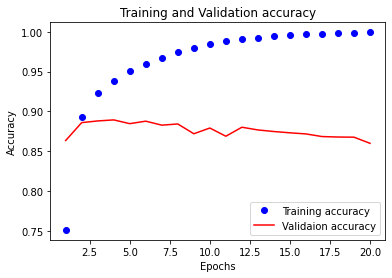

In [81]:
# training and validation accuracy
acc_vals = history_dict['accuracy']
dev_acc_vals = history_dict['val_accuracy']
epochs = range(1, len(loss_vals)+1)
print(np.mean(acc_vals), np.mean(dev_acc_vals))

# plot
plt.plot(epochs, acc_vals, 'bo', label='Training accuracy')
plt.plot(epochs, dev_acc_vals, 'r', label='Validaion accuracy')
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Full process

In [86]:
# create model
model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
# compile
model.compile(
    optimizer='rmsprop',
    loss='mse',
    metrics=['accuracy']
)
# fit and train
model.fit(
    partial_X_train,
    partial_y_train,
    epochs=5,
    batch_size=512,
    validation_data=(X_dev, y_dev)
)

Epoch 1/5


2022-02-09 16:46:36.538730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 2s 31ms/step - loss: 0.1634 - accuracy: 0.7571 - val_loss: 0.1088 - val_accuracy: 0.8567


2022-02-09 16:46:37.858027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/5
30/30 [==============================] - 0s 17ms/step - loss: 0.0743 - accuracy: 0.9080 - val_loss: 0.0930 - val_accuracy: 0.8749
Epoch 3/5
30/30 [==============================] - 1s 17ms/step - loss: 0.0536 - accuracy: 0.9347 - val_loss: 0.0855 - val_accuracy: 0.8849
Epoch 4/5
30/30 [==============================] - 1s 17ms/step - loss: 0.0400 - accuracy: 0.9509 - val_loss: 0.0955 - val_accuracy: 0.8733
Epoch 5/5
30/30 [==============================] - 0s 17ms/step - loss: 0.0282 - accuracy: 0.9670 - val_loss: 0.0876 - val_accuracy: 0.8829


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
0.11081330755259841 0.4108383968472481


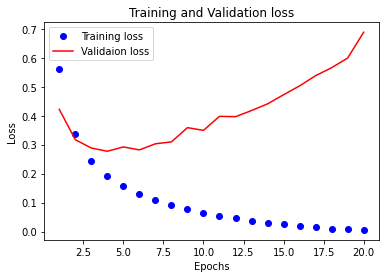

0.9638700127601624 0.8763800442218781


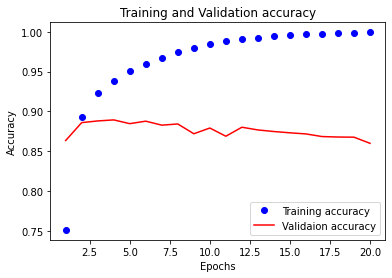

In [87]:
history_dict = history.history
print(history_dict.keys())

loss pl